## Core Mission

[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:

- **한국 작품**은 총 얼마나 있는가?
    - country column을 기준으로 한다.
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)



In [1]:
import pandas as pd

In [2]:
netf=pd.read_csv("netflix_titles.csv")
netf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print(netf[netf["country"]=="South Korea"].head())
print("한국 작품의 갯수 : " ,len(netf[netf["country"]=="South Korea"]))

    show_id     type                        title director  \
104    s105  TV Show          Tayo the Little Bus      NaN   
124    s125  TV Show  Pororo - The Little Penguin      NaN   
289    s290  TV Show            The Crowned Clown      NaN   
456    s457  TV Show             Her Private Life      NaN   
545    s546  TV Show         YooHoo to the Rescue      NaN   

                                                  cast      country  \
104                         Robyn Slade, Kami Desilets  South Korea   
124                                                NaN  South Korea   
289  Yeo Jin-goo, Lee Se-young, Kim Sang-kyung, Jun...  South Korea   
456  Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...  South Korea   
545  Kira Buckland, Ryan Bartley, Bryce Papenbrook,...  South Korea   

            date_added  release_year rating   duration  \
104  September 6, 2021          2016   TV-Y  2 Seasons   
124  September 2, 2021          2013  TV-Y7  3 Seasons   
289    August 10, 2021    

---

생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.

## Extra Mission

[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다.
    - **단일 국가**인 경우를 기준으로 결과를 구해보자.

---

In [4]:
temp=netf.groupby("country")
print("가장 많은 작품을 만든 나라 : ", temp.size().idxmax())
print("작품의 수 : ", temp.size().max())

가장 많은 작품을 만든 나라 :  United States
작품의 수 :  2818


# Mission 2. 가즈아!

서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 **Moving** **Average(이동평균법)** 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

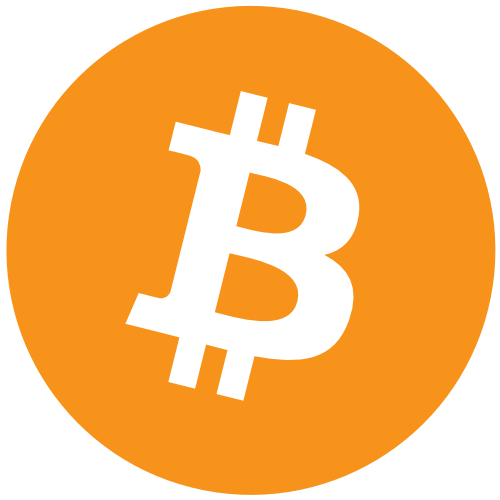

## Core Mission

[다음 데이터](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

- 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

---

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

bit=pd.read_csv("BitCoin.csv")
bit

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,10,2017-12-09,4168.88,4344.65,4085.22,4130.81,1.864530e+09,69033400000
1,41,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000
2,72,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000
3,102,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000
4,133,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000
...,...,...,...,...,...,...,...,...
1604,1482,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000
1605,1513,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000
1606,1544,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000
1607,1574,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000


In [6]:
filter1=bit[bit["Date"].str.startswith(("2016-06","2016-07","2016-08","2016-09","2016-10","2016-11","2016-12","2017-01","2017-02","2017-03","2017-04","2017-05","2017-06",))]
filter1=filter1.sort_values(by="Date", ascending=1)
filter1

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
478,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
477,594,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000
476,565,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000
475,534,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000
474,504,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000
...,...,...,...,...,...,...,...,...
106,88,2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000
105,87,2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000
104,86,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000
103,85,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000


In [7]:
from collections import defaultdict
count=defaultdict(lambda : 0)
for i in filter1.values:
    count[i[1][:7]]+=1
print(count)

defaultdict(<function <lambda> at 0x00000250B5D425F0>, {'2016-06': 30, '2016-07': 31, '2016-08': 31, '2016-09': 30, '2016-10': 31, '2016-11': 30, '2016-12': 31, '2017-01': 28, '2017-02': 25, '2017-03': 28, '2017-04': 27, '2017-05': 28, '2017-06': 27})


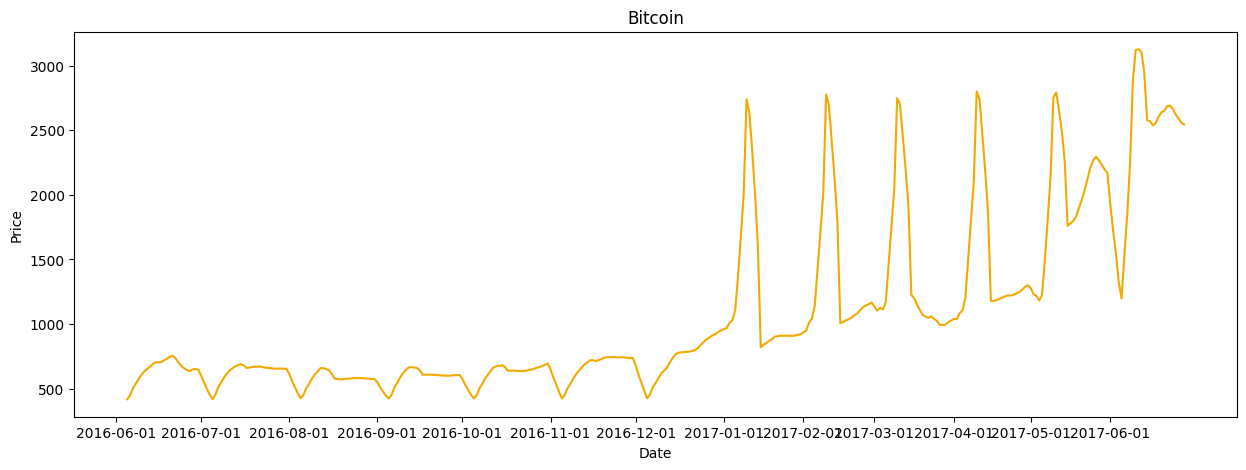

In [36]:
plt.figure(figsize=(15,5))

xtic=[]
for i in range(len(filter1.values)):
    if filter1.values[i][1].endswith('01'):
        xtic.append(i)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin")
plt.xticks(xtic)

plt.plot(filter1["Date"],filter1["Open"].rolling(5).mean(), color="#f2a900")



---

해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

## Extra Mission

위에 주어진 데이터와 더불어 [다음 데이터](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [38]:
eth=pd.read_csv("Etherium.csv")
eth


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
...,...,...,...,...,...,...,...,...
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20


In [39]:
filter2=eth[eth["Date"].str.startswith(("2016-06","2016-07","2016-08","2016-09","2016-10","2016-11","2016-12","2017-01","2017-02","2017-03","2017-04","2017-05","2017-06",))]
filter2=filter2.sort_values(by="Date", ascending=1)
filter2

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67
...,...,...,...,...,...,...,...,...
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06


In [45]:
count2=defaultdict(lambda : 0)
for i in filter2.values:
    count2[i[0][:7]]+=1
print(count)
print(count2)

defaultdict(<function <lambda> at 0x00000250B5D425F0>, {'2016-06': 30, '2016-07': 31, '2016-08': 31, '2016-09': 30, '2016-10': 31, '2016-11': 30, '2016-12': 31, '2017-01': 28, '2017-02': 25, '2017-03': 28, '2017-04': 27, '2017-05': 28, '2017-06': 27})
defaultdict(<function <lambda> at 0x00000250DB03EB00>, {'2016-06': 30, '2016-07': 31, '2016-08': 31, '2016-09': 30, '2016-10': 31, '2016-11': 30, '2016-12': 31, '2017-01': 31, '2017-02': 28, '2017-03': 31, '2017-04': 30, '2017-05': 31, '2017-06': 30})


Bitcoin의 데이터 값(count)에 누락된 값들이 많은 것이 확인되었다.

이 오차를 없애기 위해 Bitcoin의 Date 값들을 모두 list에 넣은 후 해당 Date의 Etherium값들만 포함시켜 데이터의 수를 동일하게 했다.

In [54]:
dates=[i[1] for i in filter1.values] #Bitcoin의 Date값들
dates

filter2=filter2[filter2["Date"].isin(dates)] #해당 Date값들에 포함된 Etherium의 row들만 포함시켰다.

print(len(filter1),len(filter2)) #데이터의 크기가 같음을 확인할 수 있다.

377 377


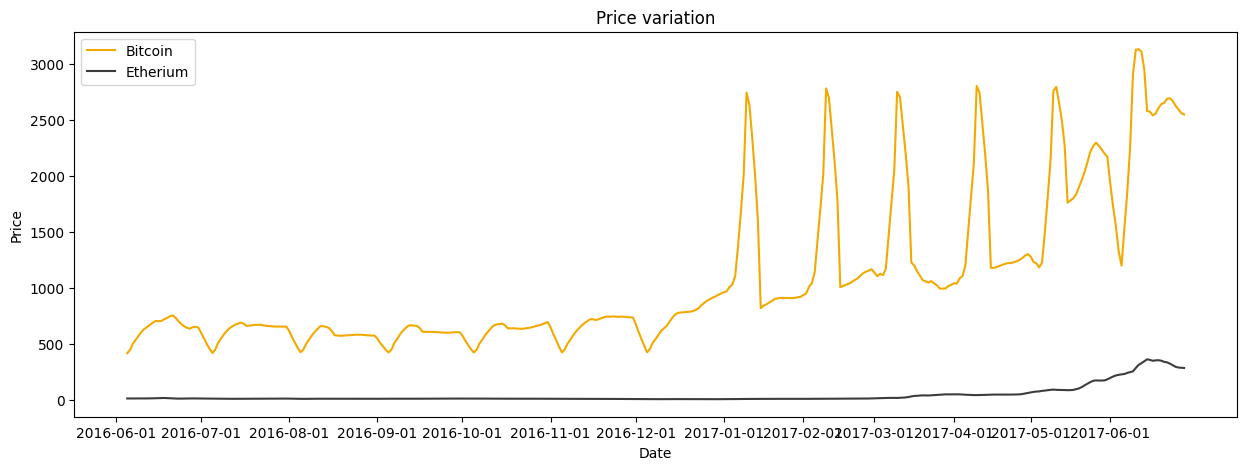

In [63]:
plt.figure(figsize=(15,5))

xtic=[]
for i in range(len(filter1.values)):
    if filter1.values[i][1].endswith('01'):
        xtic.append(i)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price variation")
plt.xticks(xtic)

plt.plot(filter1["Date"],filter1["Open"].rolling(5).mean(), color="#f2a900", label="Bitcoin")
plt.plot(filter1["Date"],filter2["Open"].rolling(5).mean(), color="#3c3c3d", label="Etherium")

plt.legend()

plt.show()